# Loading the libraries which I will use

In [4]:
import pandas as pd # library providing dataframe structures
import numpy as np # library providing linear algebra
import matplotlib
import matplotlib.pyplot as plt
import math

In [5]:
matplotlib.rcParams['figure.figsize'] = 17,17

# Exercise

The record for all lottery draws is available for download form the official lottery [website](http://www.toto.bg/statistika/6x49). The data is stored as a separate .txt file for each year from 1958 till 2016. The structure of the text files is as follows:

Draw # | N1 | N2 | N3 | N4 | N5 | N6
--- | --- | --- | --- | --- | --- | ---
#1 | 1 | 2 | 3 | 4 | 5 | 6
#2 | ... | ... | ... | ... | ... | ...

We will load all the draws from 2007 to 2016. I have already organized them in a csv file:

In [6]:
# loading the data into a pandas dataframe
df = pd.read_csv("draws.csv")

# visualizing the data
df

#df.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

,draw,N1,N2,N3,N4,N5,N6,year
0,1,8,12,16,23,25,41,2017
1,2,17,23,28,33,35,47,2017
2,3,11,14,16,42,47,48,2017
3,4,13,18,22,31,44,49,2017
4,5,6,9,19,34,47,49,2017
5,6,2,13,16,17,18,43,2017
6,7,13,27,32,33,43,49,2017
7,8,3,6,27,29,30,40,2017
8,9,14,18,19,24,30,44,2017
9,10,5,13,21,27,28,32,2017


Let's now explore some basic statistics for the numbers grouped by position - N1, N2, ...

In [7]:
df[df.columns.difference(['draw','year'])].describe()

,N1,N2,N3,N4,N5,N6
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,7.205334,14.348010,21.437765,28.505080,35.704064,42.727350
std,5.716269,7.525924,8.264460,8.210757,7.451840,6.006294
min,1.000000,1.000000,3.000000,6.000000,11.000000,13.000000
25%,3.000000,8.000000,15.000000,23.000000,31.000000,40.000000
50%,6.000000,13.000000,21.000000,29.000000,37.000000,44.000000
75%,10.000000,19.000000,27.000000,34.000000,42.000000,47.000000
max,36.000000,39.000000,43.000000,47.000000,48.000000,49.000000


We get very interesting results over here. It seems that the mean values are equally spaced (7,14,21,28,35,42). Of course we get this result because we have the numbers already sorted in ascending order in our database. In addition the standard deviations are very similar as well.

Let's visualize these distributions:

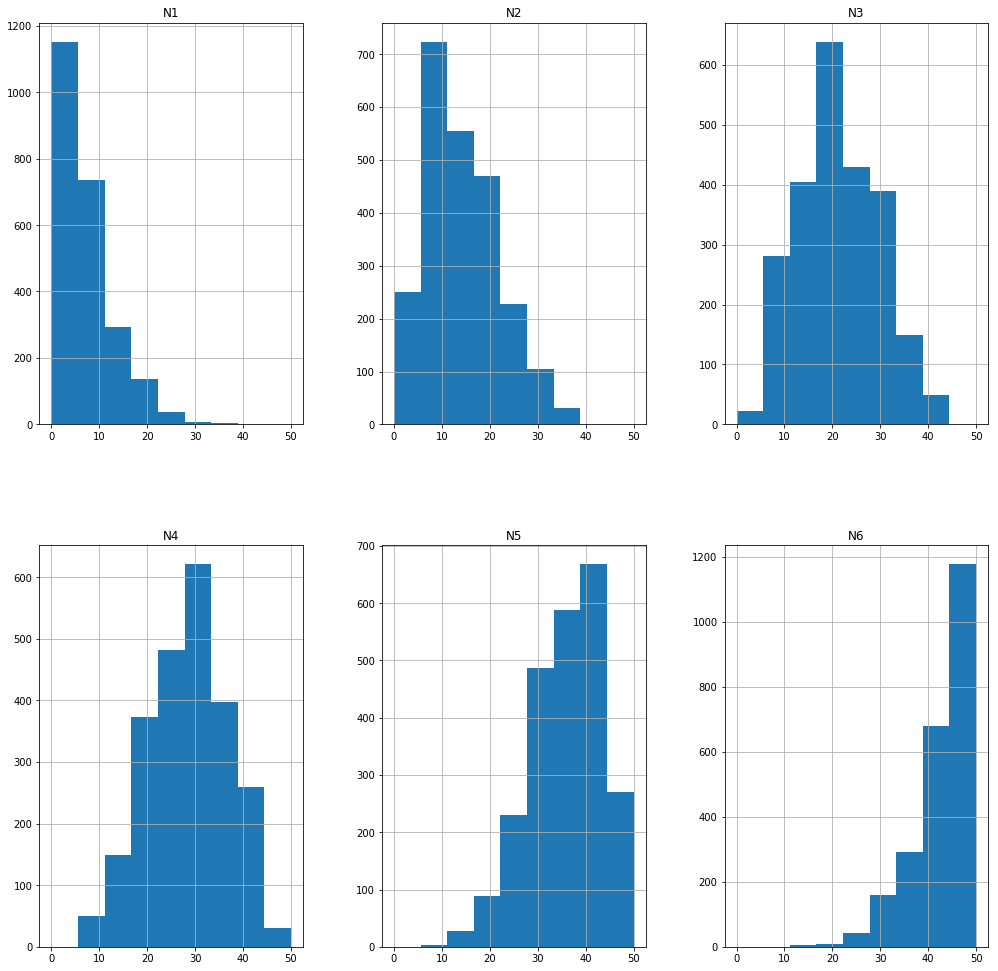

In [8]:
# defining the bins for our histogram
bins = np.linspace(0,50,10)

# subsetting the dataframe
    
df1 = df[df.columns.difference(['draw','year'])]

df1.hist(bins=bins, layout=(2,3))

plt.show()

Now I will count the occurances of each each number for each position, through the dataset

In [9]:
valueTable = df1.apply(pd.Series.value_counts)

valueTable = valueTable.fillna(0)

valueTable

,N1,N2,N3,N4,N5,N6
1,275.0,1.0,0.0,0.0,0.0,0.0
2,260.0,24.0,0.0,0.0,0.0,0.0
3,219.0,59.0,4.0,0.0,0.0,0.0
4,216.0,80.0,3.0,0.0,0.0,0.0
5,181.0,86.0,15.0,0.0,0.0,0.0
6,181.0,103.0,20.0,2.0,0.0,0.0
7,142.0,122.0,32.0,2.0,0.0,0.0
8,126.0,118.0,41.0,5.0,0.0,0.0
9,97.0,138.0,55.0,14.0,0.0,0.0
10,95.0,137.0,61.0,9.0,0.0,0.0


Now I will apply additive smoothing to the table above in order to get rid of the zeros and obtain a probability for each number from 1 to 49 to be drawin on each position. The problem is that if I keep the zeros then the probability will also become zero, which is 100% correct, but imagine that I would want to use those probabilities later to make some calculations with different combination of numbers. In this case my total probability will become zero as they get multiplied together (chain kind of thing) ...

In [10]:
valueTable += 1

valueTable

,N1,N2,N3,N4,N5,N6
1,276.0,2.0,1.0,1.0,1.0,1.0
2,261.0,25.0,1.0,1.0,1.0,1.0
3,220.0,60.0,5.0,1.0,1.0,1.0
4,217.0,81.0,4.0,1.0,1.0,1.0
5,182.0,87.0,16.0,1.0,1.0,1.0
6,182.0,104.0,21.0,3.0,1.0,1.0
7,143.0,123.0,33.0,3.0,1.0,1.0
8,127.0,119.0,42.0,6.0,1.0,1.0
9,98.0,139.0,56.0,15.0,1.0,1.0
10,96.0,138.0,62.0,10.0,1.0,1.0


In [11]:
countVector = valueTable.sum(axis=1)
countVector.sort_values(axis=0)

42    264.0
39    272.0
31    274.0
18    274.0
14    275.0
28    276.0
12    276.0
40    281.0
27    281.0
1     282.0
20    283.0
45    284.0
43    286.0
25    287.0
3     288.0
5     288.0
22    288.0
13    288.0
2     290.0
35    291.0
36    291.0
32    291.0
41    292.0
47    294.0
46    295.0
17    295.0
8     296.0
37    296.0
44    297.0
24    297.0
38    297.0
11    298.0
49    302.0
7     304.0
4     305.0
21    305.0
19    305.0
16    305.0
26    307.0
23    307.0
10    308.0
9     310.0
30    312.0
6     312.0
34    316.0
15    317.0
29    321.0
33    330.0
48    333.0
dtype: float64

Now using the valueTable which shows the occurances (favorable outcomes) to construct a probability table by simply dividing on the total number of observations we have in our inital dataset. In addition I will use another trick over here. Instead of writing the actual probabilities in the new table I will store their natural logarithm. Why would I want to do that ? Well when calculating a total probabiliy you must multiply the probabilities of the independent events which lead to the desired outcome.

The problem here is that our probabilities will be pretty small numbers when we have big number of observations. Multiplying lots of small numbers together on a computer is not a very clever idea as we could reach floating point underflow and lose accuracy in rounding the numbers and in the end compromising everything which we have done before.

In the case of logarithms however $\log(a.b) = \log(a) + \log(b)$. This totally solves our problem!

In [12]:
probTable = valueTable / len(df.index)

probLogTable = probTable.apply(np.log)

probLogTable

,N1,N2,N3,N4,N5,N6
1,-2.146863,-7.074117,-7.767264,-7.767264,-7.767264,-7.767264
2,-2.202744,-4.548388,-7.767264,-7.767264,-7.767264,-7.767264
3,-2.373636,-3.672919,-6.157826,-7.767264,-7.767264,-7.767264
4,-2.387367,-3.372815,-6.380970,-7.767264,-7.767264,-7.767264
5,-2.563257,-3.301356,-4.994675,-7.767264,-7.767264,-7.767264
6,-2.563257,-3.122873,-4.722742,-6.668652,-7.767264,-7.767264
7,-2.804419,-2.955080,-4.270756,-6.668652,-7.767264,-7.767264
8,-2.923077,-2.988141,-4.029594,-5.975505,-7.767264,-7.767264
9,-3.182297,-2.832790,-3.741912,-5.059214,-7.767264,-7.767264
10,-3.202916,-2.840010,-3.640130,-5.464679,-7.767264,-7.767264


Now I will define a function which will calculate the probability drawing an ordered set of 6 numbers

In [13]:
def setProbability(df, x):
    '''
    input: 
        df - data frame with log probabilities
        x - vector of 6 ordered numbers [x1,x2,x3,...]
    '''
    x -= 1
    df1 = df.iloc[x]
    return math.exp(sum(df1.sum(axis=1)))

setProbability(probLogTable, np.array([15,29,30,33,34,48]))

1.7155216143004288e-74

In [14]:
setProbability(probLogTable, np.array([6,15,29,33,34,48]))

8.322795127260539e-77